# Problem Statement
Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

Here is the code to load the data:


In [1]:
import numpy as np

import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt

import sklearn

from sklearn.datasets import load_boston

boston = load_boston()

bos = pd.DataFrame(boston.data)

In [2]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [4]:
bos.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [5]:
bos.shape


(506, 13)

In [6]:
bos.columns

RangeIndex(start=0, stop=13, step=1)

In [7]:
dir(bos)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [12]:
# Create dataframe
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
# Adding target to dataframe
df['TGT'] = boston.target

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
df.info() # no object data in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
TGT        506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


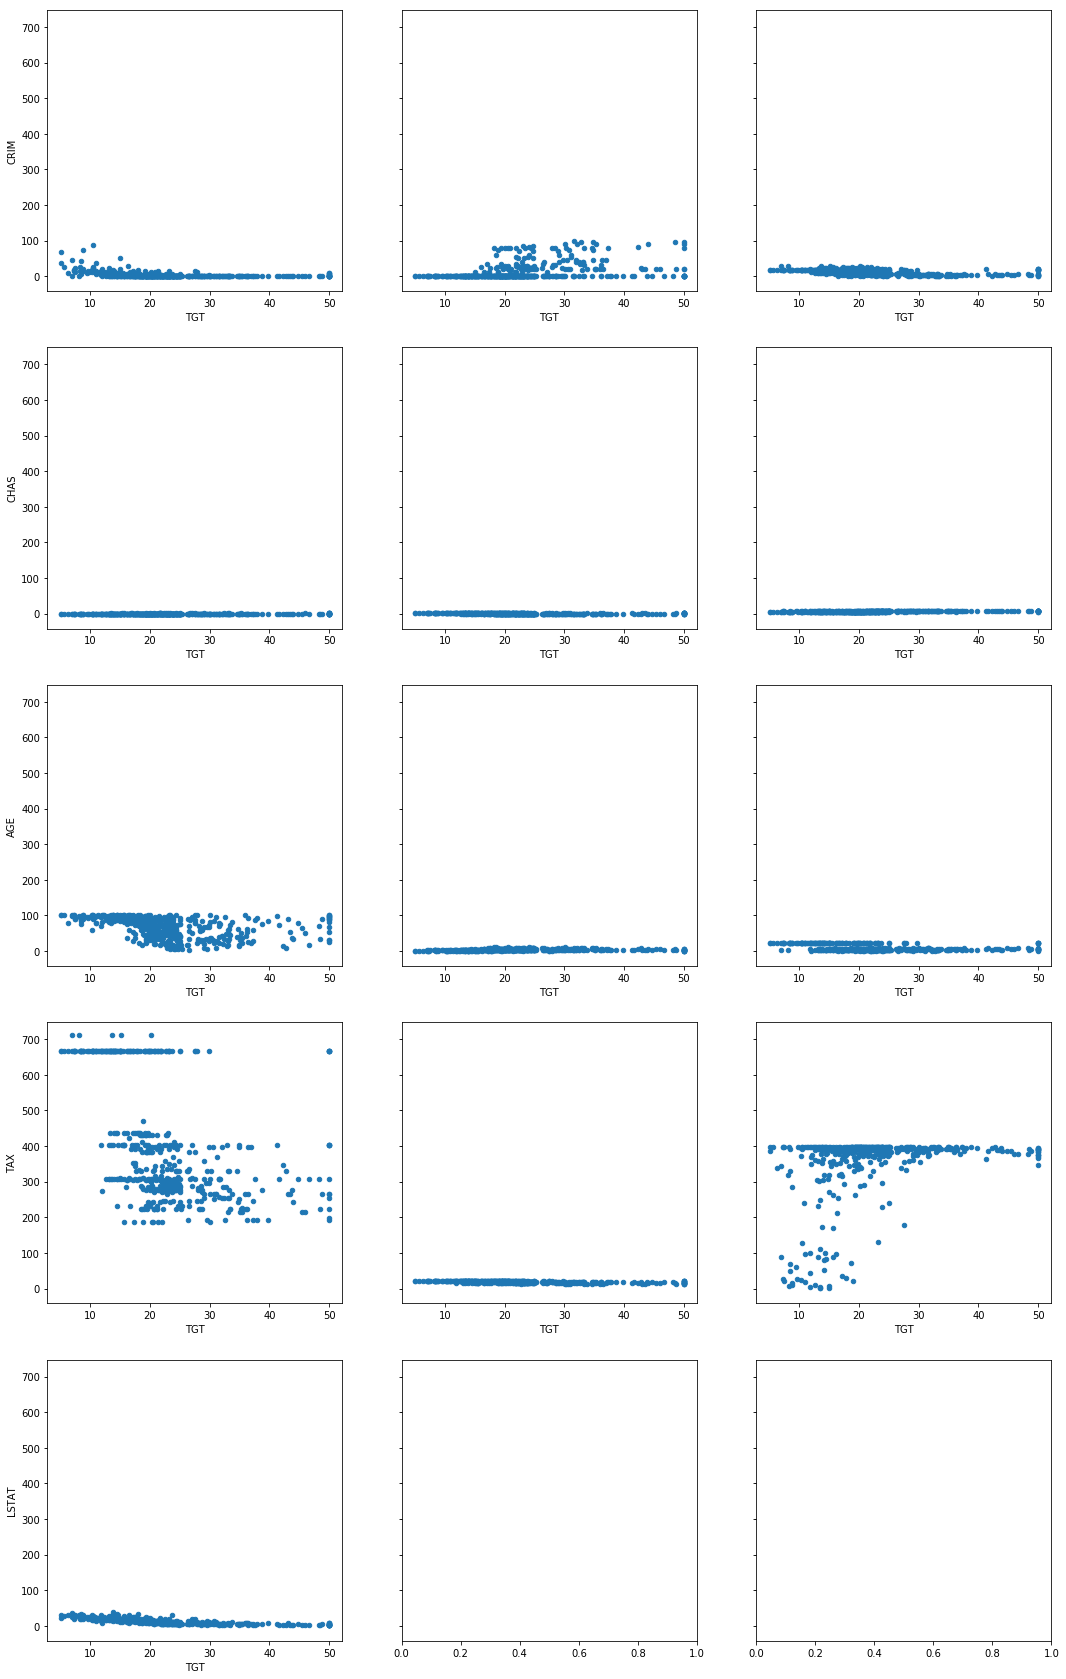

In [16]:
# visualisation
fig, axs = plt.subplots(5,3,sharey=True)
df.plot(kind='scatter', x='TGT', y='CRIM', ax=axs[0][0], figsize=(18, 30))
df.plot(kind='scatter', x='TGT', y='ZN', ax=axs[0][1])
df.plot(kind='scatter', x='TGT', y='INDUS', ax=axs[0][2])
df.plot(kind='scatter', x='TGT', y='CHAS', ax=axs[1][0])
df.plot(kind='scatter', x='TGT', y='NOX', ax=axs[1][1])
df.plot(kind='scatter', x='TGT', y='RM', ax=axs[1][2])
df.plot(kind='scatter', x='TGT', y='AGE', ax=axs[2][0])
df.plot(kind='scatter', x='TGT', y='DIS', ax=axs[2][1])
df.plot(kind='scatter', x='TGT', y='RAD', ax=axs[2][2])
df.plot(kind='scatter', x='TGT', y='TAX', ax=axs[3][0])
df.plot(kind='scatter', x='TGT', y='PTRATIO', ax=axs[3][1])
df.plot(kind='scatter', x='TGT', y='B', ax=axs[3][2])
df.plot(kind='scatter', x='TGT', y='LSTAT', ax=axs[4][0])

In [17]:
# create X and y  to avoid 1-D & 2-D error
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
x = df[feature_cols]
y = df.TGT


# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression # if we put as lm in this statement then error. requires 1 missing argument.
lm = LinearRegression()
print(lm)
lm.fit(x, y)

# print intercept and coefficients
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print(lm.fit(x,y))
print(lm.score(x,y))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Intercept 36.45948838509015
Coefficient [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
0.7406426641094095


In [18]:
print(lm.predict(x))

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

In [19]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula='TGT ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=df).fit()
print(lm2.pvalues)
print('rsquared', lm2.rsquared)
print(lm2.conf_int())

Intercept    3.283438e-12
CRIM         1.086810e-03
ZN           7.781097e-04
INDUS        7.382881e-01
CHAS         1.925030e-03
NOX          4.245644e-06
RM           1.979441e-18
AGE          9.582293e-01
DIS          6.013491e-13
RAD          5.070529e-06
TAX          1.111637e-03
PTRATIO      1.308835e-12
B            5.728592e-04
LSTAT        7.776912e-23
dtype: float64
rsquared 0.7406426641094095
                   0          1
Intercept  26.432226  46.486751
CRIM       -0.172584  -0.043438
ZN          0.019449   0.073392
INDUS      -0.100268   0.141385
CHAS        0.993904   4.379563
NOX       -25.271634 -10.261589
RM          2.988727   4.631004
AGE        -0.025262   0.026647
DIS        -1.867455  -1.083679
RAD         0.175692   0.436407
TAX        -0.019723  -0.004946
PTRATIO    -1.209795  -0.695699
B           0.004034   0.014589
LSTAT      -0.624404  -0.425113


In [20]:
lm2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.734    
Dependent Variable: TGT              AIC:                3025.6086
Date:               2019-06-25 21:30 BIC:                3084.7801
No. Observations:   506              Log-Likelihood:     -1498.8  
Df Model:           13               F-statistic:        108.1    
Df Residuals:       492              Prob (F-statistic): 6.72e-135
R-squared:          0.741            Scale:              22.518   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   36.4595    5.1035    7.1441  0.0000   26.4322   46.4868
CRIM        -0.1080    0.0329   -3.2865  0.0011   -0.1726   -0.0434
ZN           0.0464    0.0137    3.3816  0.0008    0.0194    0.0734
INDUS        0.0206    0.0615    0.3343  0.7383   -0.1003    0.1414
CHAS         2.6867    0.8616    3.1184  0.0019    0.9939    4.3796
NOX        -17.7666    3.8197   -4.6513  0.0000  -25.2716  -10.2616
RM           3.8099    0.4179    9.1161  0.0000    2.9887    4.6310
AGE          0.0007    0.0132    0.0524  0.9582   -0.0253    0.0266
DIS         -1.4756    0.1995   -7.3980  0.0000   -1.8675   -1.0837
RAD          0.3060    0.0663    4.6129  0.0000    0.1757    0.4364
TAX         -0.0123    0.0038   -3.2800  0.0011   -0.0197   -0.0049
PTRATIO     -0.9527    0.1308   -7.2825  0.0000   -1.2098   -0.6957
B            0.0093    0.0027    3.4668  0.0006    0.0040    0.0146
LSTAT       -0.5248    0.0507  -10.3471  0.0000   -0.6244   -0.4251
------------------------------------------------------------------
Omnibus:             178.041       Durbin-Watson:          1.078  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       783.126
Skew:                1.521         Prob(JB):               0.000  
Kurtosis:            8.281         Condition No.:          15114  
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

pvalue of INDUS and AGE signifies that these 2 feature is not of importance.

In [21]:
# without INDUS and AGE
lm2_2 = smf.ols(formula='TGT ~ CRIM+ZN+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=df).fit()
print(lm2_2.pvalues)
print('rsquared', lm2_2.rsquared)
print(lm2_2.conf_int())

Intercept    2.727265e-12
CRIM         1.010438e-03
ZN           7.542759e-04
CHAS         1.551469e-03
NOX          1.209413e-06
RM           2.889779e-19
DIS          6.837043e-15
RAD          2.996799e-06
TAX          5.214237e-04
PTRATIO      9.235063e-13
B            5.565743e-04
LSTAT        2.140586e-25
dtype: float64
rsquared 0.7405822802569575
                   0          1
Intercept  26.384649  46.297641
CRIM       -0.172818  -0.044009
ZN          0.019276   0.072414
CHAS        1.040325   4.397108
NOX       -24.321990 -10.430057
RM          3.003258   4.599899
DIS        -1.857631  -1.127792
RAD         0.175037   0.424179
TAX        -0.018404  -0.005152
PTRATIO    -1.200110  -0.692939
B           0.004037   0.014544
LSTAT      -0.615732  -0.429375


In [22]:
lm2_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.735    
Dependent Variable: TGT              AIC:                3021.7264
Date:               2019-06-25 21:31 BIC:                3072.4448
No. Observations:   506              Log-Likelihood:     -1498.9  
Df Model:           11               F-statistic:        128.2    
Df Residuals:       494              Prob (F-statistic): 5.54e-137
R-squared:          0.741            Scale:              22.432   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   36.3411    5.0675    7.1714  0.0000   26.3846   46.2976
CRIM        -0.1084    0.0328   -3.3074  0.0010   -0.1728   -0.0440
ZN           0.0458    0.0135    3.3902  0.0008    0.0193    0.0724
CHAS         2.7187    0.8542    3.1826  0.0016    1.0403    4.3971
NOX        -17.3760    3.5352   -4.9151  0.0000  -24.3220  -10.4301
RM           3.8016    0.4063    9.3562  0.0000    3.0033    4.5999
DIS         -1.4927    0.1857   -8.0370  0.0000   -1.8576   -1.1278
RAD          0.2996    0.0634    4.7255  0.0000    0.1750    0.4242
TAX         -0.0118    0.0034   -3.4925  0.0005   -0.0184   -0.0052
PTRATIO     -0.9465    0.1291   -7.3337  0.0000   -1.2001   -0.6929
B            0.0093    0.0027    3.4746  0.0006    0.0040    0.0145
LSTAT       -0.5226    0.0474  -11.0187  0.0000   -0.6157   -0.4294
------------------------------------------------------------------
Omnibus:             178.430       Durbin-Watson:          1.078  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       787.785
Skew:                1.523         Prob(JB):               0.000  
Kurtosis:            8.300         Condition No.:          14685  
==================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

Here without INDUS and AGE, model adj.R square increased as well as AIC/BIC decreased.

In [24]:
# Test and Train split
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
x = df[feature_cols]
y = df.TGT

In [25]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test) = train_test_split(x,y,test_size=0.3,random_state = 0)

In [26]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


In [27]:
# fit model
lm3 = LinearRegression()
lm3.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# predictions = lm.predict(X_test)
predictions = lm3.predict(x_test)
predictions[0:5]

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478])

In [29]:
lm3.score(x_test,y_test)


0.6733825506400175

67.35% Accuracy

In [31]:
lm3.intercept_

37.937107741833316

In [32]:
lm3.coef_


array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

Text(0, 0.5, 'Predictions')

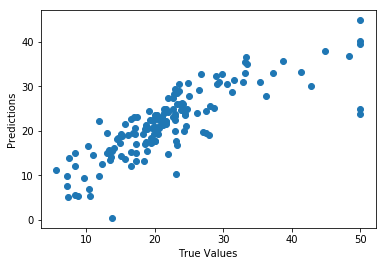

In [33]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')